<a href="https://colab.research.google.com/github/trailmarkerlib/policeProjectPythonWorkshop/blob/main/python_workshop_2024_02_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
import datetime

### Connect to Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Read marijuana csv file

In [4]:
drive_url = '/content/drive/MyDrive/_CAASI/Grief to Action - PDAP/'

In [5]:

df = pd.read_csv(drive_url + 'marijuana.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    13169 non-null  int64  
 1   PK                     13169 non-null  int64  
 2   CCR                    13169 non-null  int64  
 3   AGE                    13119 non-null  float64
 4   GENDER                 13169 non-null  object 
 5   RACE                   13169 non-null  object 
 6   ARRESTTIME             13169 non-null  object 
 7   ARRESTLOCATION         13169 non-null  object 
 8   OFFENSES               13169 non-null  object 
 9   INCIDENTLOCATION       13169 non-null  object 
 10  INCIDENTNEIGHBORHOOD   12864 non-null  object 
 11  INCIDENTZONE           13156 non-null  object 
 12  INCIDENTTRACT          12872 non-null  float64
 13  COUNCIL_DISTRICT       11473 non-null  float64
 14  PUBLIC_WORKS_DIVISION  11473 non-null  float64
 15  X 

In [7]:
df.ARRESTTIME.head()

0    2016-08-22T22:09:00
1    2016-08-27T02:04:00
2    2016-08-29T11:20:00
3    2016-08-13T17:08:00
4    2016-08-11T18:12:00
Name: ARRESTTIME, dtype: object

In [8]:
df['ARRESTTIME'] = pd.to_datetime(df['ARRESTTIME'])

In [9]:
df['ARRESTYEAR'] = [x.year for x in df['ARRESTTIME']]

In [10]:
df.tail()

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,mari_flag,ARRESTYEAR
13164,86912,2063134,23155492,57.0,M,B,2023-09-30 09:00:00,"5th AV & Vine ST Pittsburgh, PA 15219",13(a)(16) Possession of Controlled Substance /...,"5th AV & Vine ST Pittsburgh, PA 15219",Bluff,2,103.0,6.0,3.0,-79.984089,40.438506,1,2023
13165,86947,2063140,23148791,53.0,F,B,2023-09-18 18:13:00,"600 Block Smithfield ST Pittsburgh, PA 15222",13(a)(16) Possession of Controlled Substance /...,"600 Block Smithfield ST Pittsburgh, PA 15222",Central Business District,2,201.0,6.0,6.0,-79.997409,40.441533,1,2023
13166,86975,2063182,23153260,31.0,M,B,2023-09-26 15:46:00,"400 Block Foreland ST Pittsburgh, PA 15212",13(a)(32) Paraphernalia - Use or Possession / ...,"400 Block Foreland ST Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001905,40.454087,1,2023
13167,86978,2063185,23153340,70.0,M,B,2023-09-26 17:10:00,"400 Block Wood ST Pittsburgh, PA 15222",4910 Tampering with or Fabricating Physical Ev...,"400 Block Wood ST Pittsburgh, PA 15222",Central Business District,2,201.0,6.0,6.0,-80.001080,40.439433,1,2023
13168,86985,2063192,23150705,40.0,M,B,2023-09-21 23:04:00,"S 14th ST & Bingham ST Pittsburgh, PA 15203",13(a)(16) Possession of Controlled Substance /...,"S 14th ST & Bingham ST Pittsburgh, PA 15203",South Side Flats,3,1702.0,3.0,3.0,-79.984145,40.429457,1,2023


#### Subset arrests to include only 2017 - 2023 and summarize by year

In [68]:
summ_by_year_df = df.loc[(df['ARRESTYEAR'] >= 2017) & (df['ARRESTYEAR'] <= 2023)].\
            groupby('ARRESTYEAR').\
            aggregate(arrest_count=('PK', 'count')).\
            reset_index().\
            copy()

In [69]:
summ_by_year_df

,ARRESTYEAR,arrest_count
0,2017,2841
1,2018,2504
2,2019,2392
3,2020,1732
4,2021,1136
5,2022,844
6,2023,887


#### Create a line plot: Number of Arrests by Year

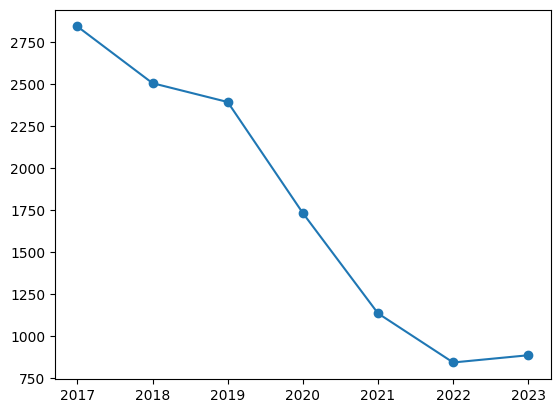

In [70]:
plt.plot(summ_by_year_df['ARRESTYEAR'], summ_by_year_df['arrest_count'], marker='o', linestyle='solid')

Text(0.5, 1.0, 'Pittsburgh Arrests by Year')

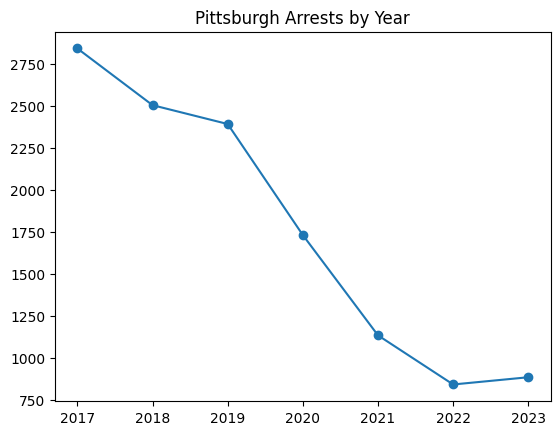

In [71]:
plt.plot(summ_by_year_df['ARRESTYEAR'], summ_by_year_df['arrest_count'], marker='o', linestyle='solid')
plt.title('Pittsburgh Arrests by Year')

Text(0, 0.5, 'Number of Arrests')

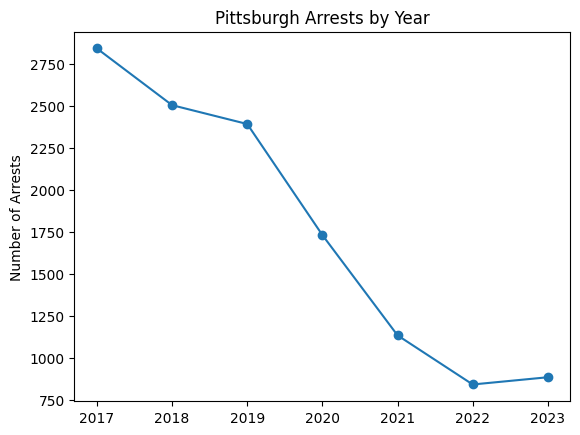

In [72]:
plt.plot(summ_by_year_df['ARRESTYEAR'], summ_by_year_df['arrest_count'], marker='o', linestyle='solid')
plt.title('Pittsburgh Arrests by Year')
plt.ylabel('Number of Arrests')

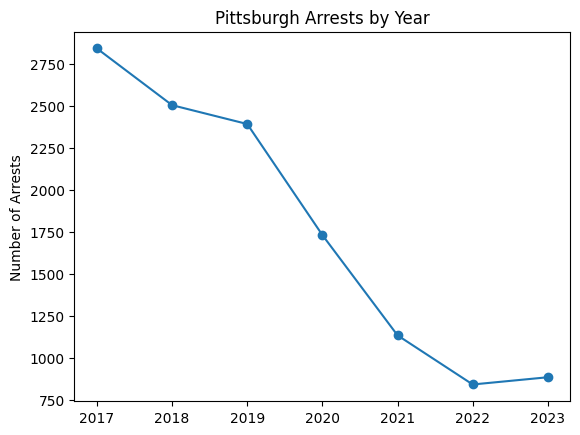

In [73]:
plt.plot(summ_by_year_df['ARRESTYEAR'], summ_by_year_df['arrest_count'], marker='o', linestyle='solid')
plt.title('Pittsburgh Arrests by Year')
plt.ylabel('Number of Arrests')
plt.show()

#### Create a line plot: Number of Arrests by Month

In [74]:
df['ARRESTMONTH'] = [str(x.month) + '/1/' + str(x.year) for x in df['ARRESTTIME']]

In [75]:
df['ARRESTMONTH'] = df['ARRESTTIME'].dt.strftime('%Y-%m')

In [76]:
df['ARRESTMONTH'].unique()

array(['2016-08', '2016-09', '2016-07', '2016-02', '2015-05', '2016-10',
       '2016-11', '2016-12', '2017-01', '2016-04', '2017-02', '2017-03',
       '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09',
       '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03',
       '2018-04', '2011-06', '2018-05', '2014-02', '2018-06', '2018-07',
       '2014-11', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2015-03', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05',
       '2019-06', '2019-07', '2015-09', '2015-10', '2019-08', '2019-09',
       '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03',
       '2020-04', '2015-04', '2020-05', '2020-06', '2020-07', '2020-08',
       '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02',
       '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08',
       '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02',
       '2022-03', '2022-04', '2022-05', '2022-06', 

#### Subset arrests to include only 2022 and summarize by month

In [77]:
summ_by_month_df = df.groupby(['ARRESTYEAR', 'ARRESTMONTH']).\
            aggregate(arrest_count=('PK', 'count')).\
            reset_index().\
            sort_values('ARRESTMONTH').\
            copy()

In [78]:
summ_by_month_df.head(10)

,ARRESTYEAR,ARRESTMONTH,arrest_count
0,2011,2011-06,1
1,2014,2014-02,2
2,2014,2014-11,1
3,2015,2015-03,1
4,2015,2015-04,1
5,2015,2015-05,1
6,2015,2015-09,2
7,2015,2015-10,1
8,2016,2016-02,1
9,2016,2016-04,1


In [79]:
summ_year_2022 = summ_by_month_df.loc[summ_by_month_df['ARRESTYEAR'] == 2022].copy()

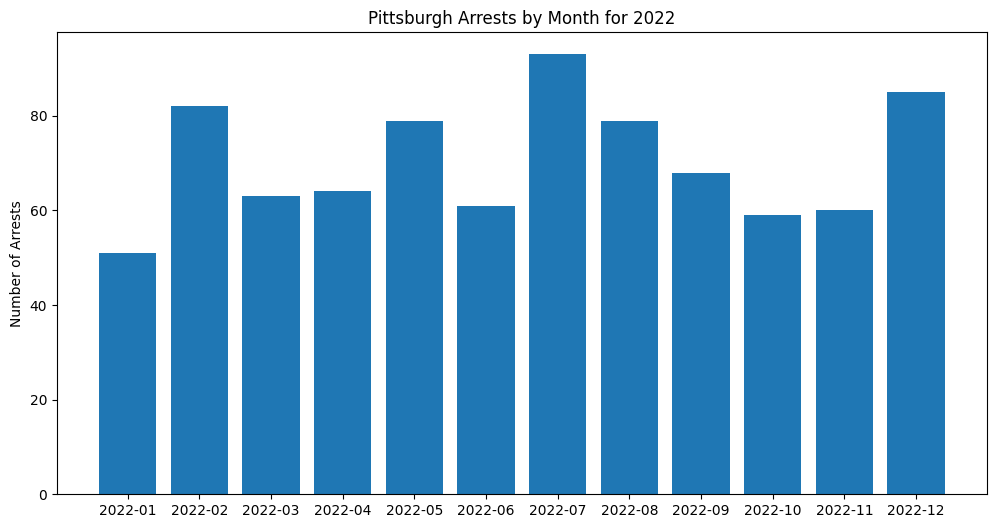

In [80]:
plt.figure(figsize=(12,6))
plt.bar(summ_year_2022['ARRESTMONTH'], summ_year_2022['arrest_count'], 0.8)
plt.title('Pittsburgh Arrests by Month for 2022')
plt.ylabel('Number of Arrests')
plt.show()

In [81]:
summ_year_2021 = summ_by_month_df.loc[summ_by_month_df['ARRESTYEAR'] == 2021].copy()

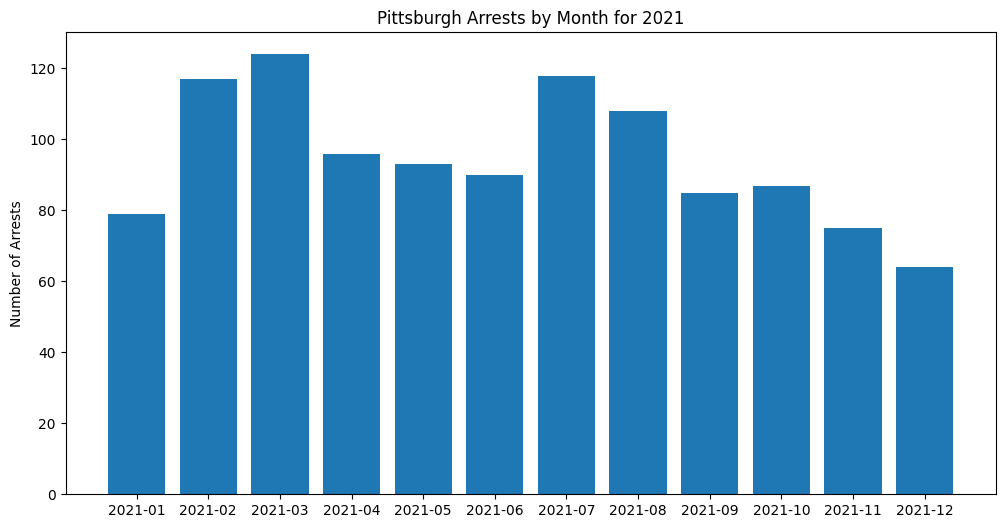

In [82]:
plt.figure(figsize=(12,6))
plt.bar(summ_year_2021['ARRESTMONTH'], summ_year_2021['arrest_count'], 0.8)
plt.title('Pittsburgh Arrests by Month for 2021')
plt.ylabel('Number of Arrests')
plt.show()

#### Summarize by police zone, race, and gender

In [83]:
arrests_by_zone = df.groupby(['INCIDENTZONE']).\
            aggregate(mj_arrests_count = ('OFFENSES', 'count')).\
            reset_index().copy()

In [84]:
arrests_by_zone

,INCIDENTZONE,mj_arrests_count
0,1,3405
1,2,1985
2,3,2185
3,4,1071
4,5,3379
5,6,973
6,OSC,158


In [85]:
arrests_by_race = df.groupby(['RACE']).\
            aggregate(mj_arrests_count = ('OFFENSES', 'count')).\
            reset_index().copy()

In [86]:
arrests_by_race

,RACE,mj_arrests_count
0,A,25
1,B,8212
2,H,80
3,I,4
4,O,82
5,U,53
6,W,4713


In [88]:
arrests_by_gender = df.groupby(['GENDER']).\
            aggregate(mj_arrests_count = ('OFFENSES', 'count')).\
            reset_index().copy()

In [89]:
arrests_by_gender

,GENDER,mj_arrests_count
0,F,2987
1,M,10166
2,U,16


#### Visualize the data

Seaborn color palettes:
https://seaborn.pydata.org/tutorial/color_palettes.html

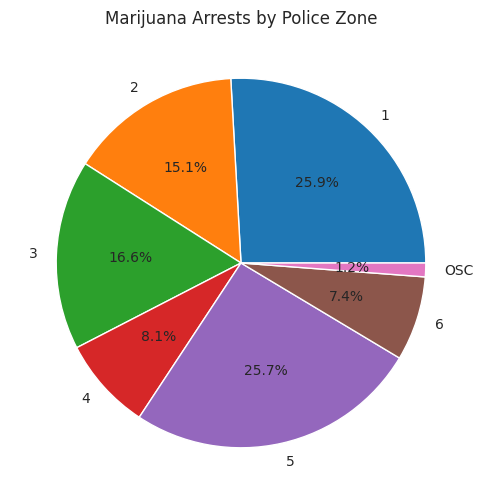

In [90]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(arrests_by_zone['mj_arrests_count'], labels=arrests_by_zone['INCIDENTZONE'], autopct='%1.1f%%')
plt.title('Marijuana Arrests by Police Zone')
plt.savefig('Marijuana_arrests_by_zone.png')
plt.show()

In [91]:
arrests_by_race_BHW = arrests_by_race.loc[arrests_by_race['RACE'].isin(['B','H','W'])].copy()

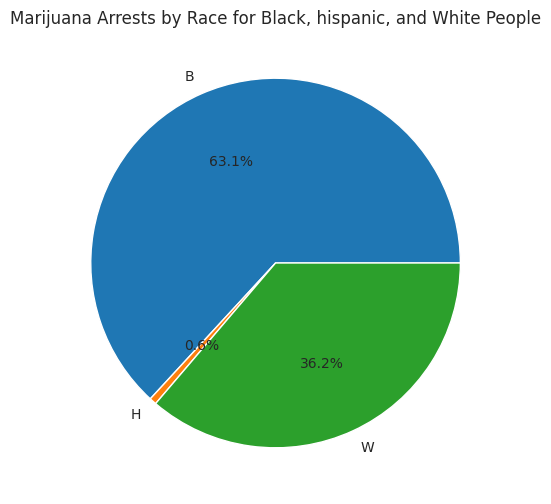

In [92]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(arrests_by_race_BHW['mj_arrests_count'], labels=arrests_by_race_BHW['RACE'], autopct='%1.1f%%')
plt.title('Marijuana Arrests by Race for Black, hispanic, and White People')
plt.savefig('Marijuana_arrests_by_race.png')
plt.show()

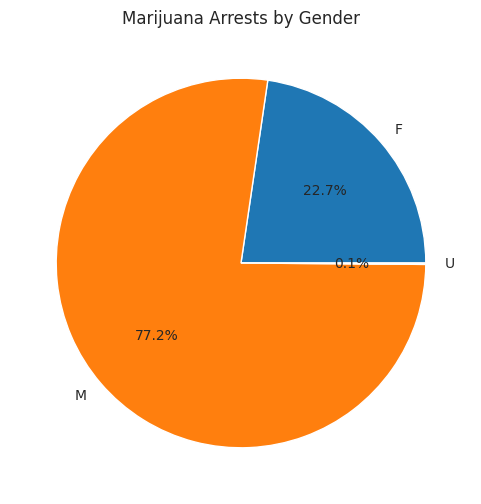

In [93]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(arrests_by_gender['mj_arrests_count'], labels=arrests_by_gender['GENDER'], autopct='%1.1f%%')
plt.title('Marijuana Arrests by Gender')
plt.savefig('Marijuana_arrests_by_gender.png')
plt.show()